In [1]:
import pandas as pd

fraud = pd.read_csv("../Data/raw/Fraud_Data.csv")
ip_map = pd.read_csv("../Data/raw/IpAddress_to_Country.csv")

In [2]:
fraud.head()
fraud.info()
fraud.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [3]:
fraud['signup_time'] = pd.to_datetime(fraud['signup_time'])
fraud['purchase_time'] = pd.to_datetime(fraud['purchase_time'])
fraud['ip_address'] = fraud['ip_address'].astype(int)

In [4]:
fraud.duplicated().sum()
fraud = fraud.drop_duplicates()

In [5]:
fraud['class'].value_counts()
fraud['class'].value_counts(normalize=True)

class
0    0.906354
1    0.093646
Name: proportion, dtype: float64

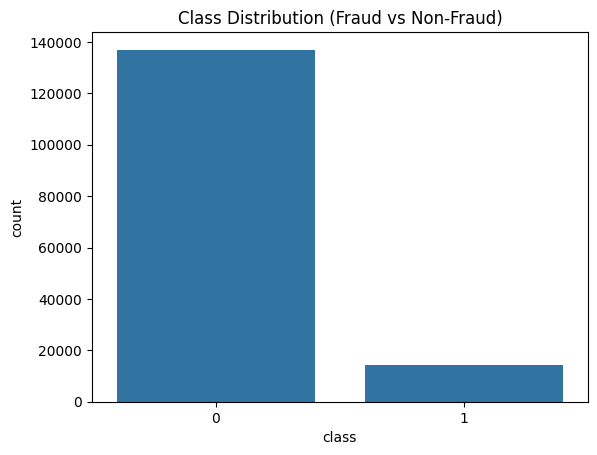

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=fraud)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()

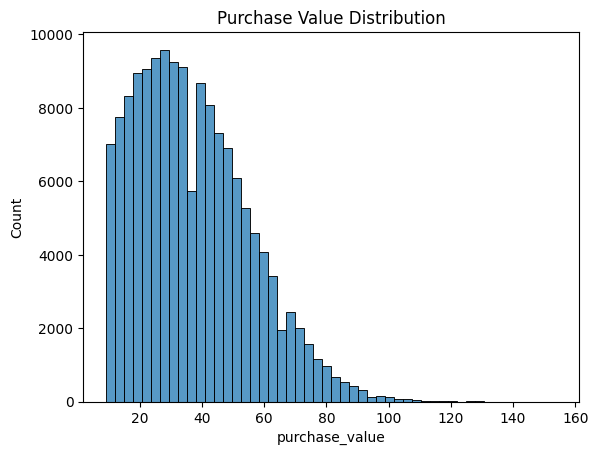

In [7]:
sns.histplot(fraud['purchase_value'], bins=50)
plt.title("Purchase Value Distribution")
plt.show()

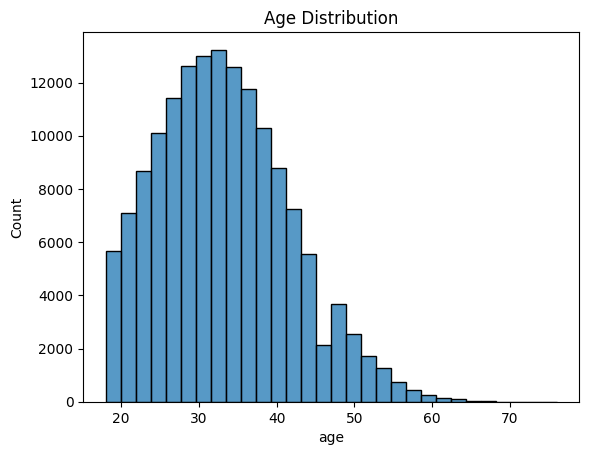

In [8]:
sns.histplot(fraud['age'], bins=30)
plt.title("Age Distribution")
plt.show()

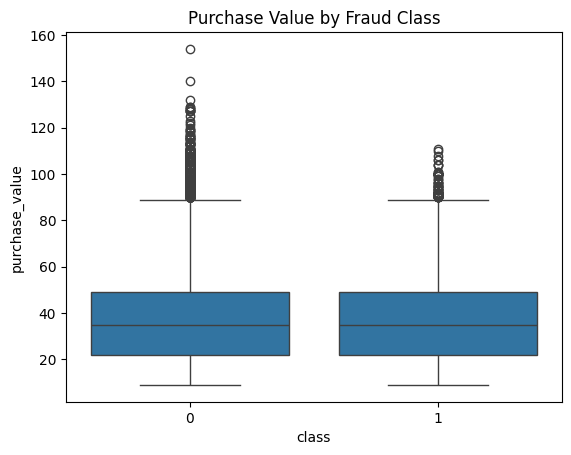

In [9]:
sns.boxplot(x='class', y='purchase_value', data=fraud)
plt.title("Purchase Value by Fraud Class")
plt.show()

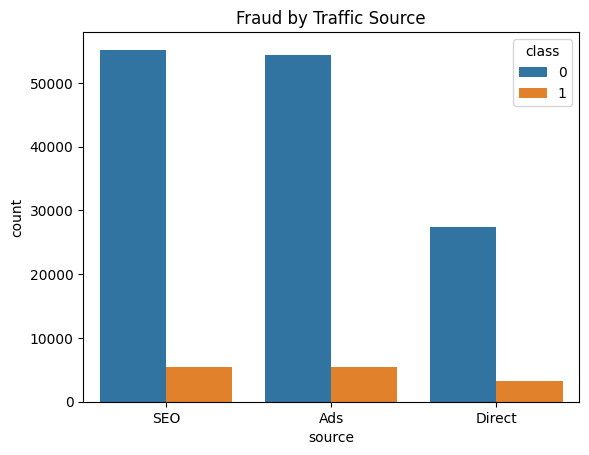

In [10]:
sns.countplot(x='source', hue='class', data=fraud)
plt.title("Fraud by Traffic Source")
plt.show()

In [11]:
fraud['hour_of_day'] = fraud['purchase_time'].dt.hour
fraud['day_of_week'] = fraud['purchase_time'].dt.dayofweek

In [12]:
fraud['time_since_signup'] = (
    fraud['purchase_time'] - fraud['signup_time']
).dt.total_seconds() / 3600

In [13]:
txn_count = fraud.groupby('user_id')['purchase_time'].count()
fraud['user_txn_count'] = fraud['user_id'].map(txn_count)

In [14]:
fraud.to_csv("../Data/processed/fraud_processed.csv", index=False)